# Mini Project 1 - Airbnb

**Problem Statement:**  
> a) Should our investor invest in an AirBnB hotel in Amsterdam?  
> b) And, if so, which neighborhood should they invest in? 

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

from pandas import ExcelFile
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

%matplotlib inline

In [2]:
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize': (20, 6)})

## Dataset  

In [3]:
airbnb = pd.read_csv('dat/Airbnb Data Mini Project 1.csv')

# Exploratory Data Analysis

## Data Wrangling and Munging
Getting to know the dataset

### Preliminary Checks 

In [4]:
# First 5 rows
airbnb.head()

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008,8/11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008,9/24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008,10/19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008,11/30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008,12/17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


In [5]:
# Last 5 rows
airbnb.tail()

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
7828,30574000,Kathleen,2015,4/4,5887073,Oostelijk Havengebied - Indische Buurt,Amsterdam,Noord-Holland,1019 SG,Netherlands,52.379848,4.923520,Apartment,Entire home/apt,4,1.0,2.0,4.0,Real Bed,150,1,0,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7829,30575462,James,2015,4/4,5887362,Centrum-West,Amsterdam,Noord-Holland,1012 KC,Netherlands,52.373175,4.894218,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,160,2,30,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7830,30592860,Ruud,2015,4/4,5896701,Centrum-Oost,Amsterdam,Noord-Holland,1011,Netherlands,52.371165,4.902039,Apartment,Entire home/apt,4,1.5,2.0,2.0,Real Bed,165,4,30,4,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7831,30593666,Trevelbadi,2015,4/4,5891027,Noord-West,Amsterdam,Noord-Holland,1035,Netherlands,52.414229,4.899890,House,Entire home/apt,2,1.0,0.0,1.0,Real Bed,70,1,15,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7832,30595041,Christiaan,2015,4/4,5891278,De Pijp - Rivierenbuurt,Amsterdam,Noord-Holland,1072 GW,Netherlands,52.350974,4.890545,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,115,1,0,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# shape of dataframe
airbnb.shape

(7833, 33)

In [7]:
# datatypes of each column
airbnb.dtypes

host_id                          int64
host_name                       object
host_since_year                  int64
host_since_anniversary          object
id                               int64
neighbourhood_cleansed          object
city                            object
state                           object
zipcode                         object
country                         object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bathrooms                      float64
bedrooms                       float64
beds                           float64
bed_type                        object
price                            int64
guests_included                  int64
extra_people                     int64
minimum_nights                   int64
host_response_time              object
host_response_rate             float64
number_of_reviews        

In [8]:
# Check if there are any null values
airbnb.isna().sum()

host_id                           0
host_name                         0
host_since_year                   0
host_since_anniversary            0
id                                0
neighbourhood_cleansed            0
city                              0
state                             8
zipcode                         173
country                           0
latitude                          0
longitude                         0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        69
bedrooms                         14
beds                             13
bed_type                          0
price                             0
guests_included                   0
extra_people                      0
minimum_nights                    0
host_response_time              732
host_response_rate              732
number_of_reviews                 0
review_scores_rating           1698
review_scores_accuracy      

In [9]:
# Describe the dataset
airbnb.describe()

,host_id,host_since_year,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,7.833000e+03,7833.000000,7.833000e+03,7833.000000,7833.000000,7833.000000,7764.000000,7819.000000,7820.000000,7833.000000,7833.000000,7833.000000,7833.000000,7101.000000,7833.000000,6135.000000,6124.000000,6124.000000,6125.000000,6122.000000,6124.000000,6122.000000
mean,9.879849e+06,2012.929784,2.926936e+06,52.366533,4.888232,3.114643,1.112957,1.414887,1.983887,129.010979,1.641900,13.617133,2.509000,0.908396,13.832887,93.342298,9.446930,9.289517,9.638857,9.698301,9.292946,9.040346
std,7.932933e+06,1.174583,1.739974e+06,0.014116,0.030059,1.757483,0.394872,0.886217,1.654441,128.032413,1.145144,18.911285,1.898255,0.151901,25.476797,7.535279,0.815671,0.967856,0.726375,0.645667,0.849480,0.881756
min,1.662000e+03,2008.000000,2.818000e+03,52.291569,4.763264,1.000000,0.000000,0.000000,1.000000,15.000000,0.000000,0.000000,1.000000,0.020000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,3.430410e+06,2012.000000,1.309364e+06,52.356731,4.869670,2.000000,1.000000,1.000000,1.000000,85.000000,1.000000,0.000000,1.000000,0.880000,1.000000,90.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000
50%,7.392601e+06,2013.000000,2.964891e+06,52.366538,4.886406,2.000000,1.000000,1.000000,1.000000,109.000000,1.000000,0.000000,2.000000,1.000000,5.000000,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000
75%,1.505417e+07,2014.000000,4.473450e+06,52.375805,4.903265,4.000000,1.000000,2.000000,2.000000,150.000000,2.000000,25.000000,3.000000,1.000000,15.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,3.059504e+07,2015.000000,5.897527e+06,52.425381,5.019667,16.000000,8.000000,10.000000,16.000000,9000.000000,16.000000,235.000000,27.000000,1.000000,297.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


#### Checking "id" Data (Listings) 

In [10]:
# IDs are supposed to be string instead of int64 (so convert it)
#host_id to string
airbnb['host_id'] = airbnb['host_id'].astype('str')
print(airbnb['host_id'].dtypes)
#id to string
airbnb['id'] = airbnb['id'].astype('str')
print(airbnb['id'].dtypes)

object
object


In [11]:
# How many listings are there in total?
print(airbnb['host_id'].shape)

# Are there duplicates?
listing_count = airbnb.groupby('id').size().sort_values(ascending=False)
listing_count

(7833,)


id
3867915    2
5690158    2
1913383    2
738245     2
1018703    2
          ..
2929209    1
2928621    1
2925820    1
2923611    1
999908     1
Length: 7813, dtype: int64

In [12]:
# From the above, looks like there are duplicates for some listings (max 2). Let's drop the duplicates.
airbnb.drop_duplicates(subset=['id'])

,host_id,host_name,host_since_year,host_since_anniversary,id,neighbourhood_cleansed,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,host_response_time,host_response_rate,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,1662,Chloe,2008,8/11,304958,Westerpark,Amsterdam,North Holland,1053,Netherlands,52.373021,4.868461,Apartment,Entire home/apt,4,2.0,2.0,2.0,Real Bed,130,4,10,4,within a day,0.80,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,3159,Daniel,2008,9/24,2818,Oostelijk Havengebied - Indische Buurt,Amsterdam,North Holland,NaN,Netherlands,52.365755,4.941419,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,59,1,10,3,within an hour,1.00,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,3718,Britta,2008,10/19,103026,De Baarsjes - Oud-West,Amsterdam,Noord-Holland,1053,Netherlands,52.369388,4.866972,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,95,2,25,3,within a few hours,1.00,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,4716,Stefan,2008,11/30,550017,Centrum-Oost,Amsterdam,North Holland,1017,Netherlands,52.361905,4.888050,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,100,1,10,2,within a day,1.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,5271,Tyler,2008,12/17,4728389,Centrum-West,Amsterdam,Noord-Holland,1016 AM,Netherlands,52.371533,4.887057,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,250,2,25,2,within a day,0.89,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,30574000,Kathleen,2015,4/4,5887073,Oostelijk Havengebied - Indische Buurt,Amsterdam,Noord-Holland,1019 SG,Netherlands,52.379848,4.923520,Apartment,Entire home/apt,4,1.0,2.0,4.0,Real Bed,150,1,0,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7829,30575462,James,2015,4/4,5887362,Centrum-West,Amsterdam,Noord-Holland,1012 KC,Netherlands,52.373175,4.894218,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,160,2,30,2,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7830,30592860,Ruud,2015,4/4,5896701,Centrum-Oost,Amsterdam,Noord-Holland,1011,Netherlands,52.371165,4.902039,Apartment,Entire home/apt,4,1.5,2.0,2.0,Real Bed,165,4,30,4,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7831,30593666,Trevelbadi,2015,4/4,5891027,Noord-West,Amsterdam,Noord-Holland,1035,Netherlands,52.414229,4.899890,House,Entire home/apt,2,1.0,0.0,1.0,Real Bed,70,1,15,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Business Problem 1: Invest or Not to Invest?
> Prompt 1: How much revenue do successful hosts generate?
- Need to investigate "host" data
- Need to define "successful" host by investigating "reviews" data
- Need to calculate revenue by investigating "prices" data 

### Checking "Host" Data 

In [13]:
from datetime import date

# Only looking into host columns
airbnb_host = airbnb[['host_id', 'host_since_year', 'host_since_anniversary']]
airbnb_host.head()

,host_id,host_since_year,host_since_anniversary
0,1662,2008,8/11
1,3159,2008,9/24
2,3718,2008,10/19
3,4716,2008,11/30
4,5271,2008,12/17


In [14]:
# Splitting the host since anniversary into month and date
airbnb_host[['host_since_month', 'host_since_day']]  = airbnb.loc[:, ('host_since_anniversary')].str.split('/',expand=True)
airbnb_host.head()

C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,host_id,host_since_year,host_since_anniversary,host_since_month,host_since_day
0,1662,2008,8/11,8,11
1,3159,2008,9/24,9,24
2,3718,2008,10/19,10,19
3,4716,2008,11/30,11,30
4,5271,2008,12/17,12,17


In [15]:
# Concatenate the year, month and day into YYYY-MM-DD format
airbnb_host['host_since_date'] = pd.to_datetime(airbnb_host.host_since_year.astype(str) + '/' + airbnb_host.host_since_month.astype(str) + '/' + airbnb_host.host_since_day.astype(str))
airbnb_host.head()

C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,host_id,host_since_year,host_since_anniversary,host_since_month,host_since_day,host_since_date
0,1662,2008,8/11,8,11,2008-08-11
1,3159,2008,9/24,9,24,2008-09-24
2,3718,2008,10/19,10,19,2008-10-19
3,4716,2008,11/30,11,30,2008-11-30
4,5271,2008,12/17,12,17,2008-12-17


In [16]:
# Adding today's date as a column and changing it to YYYY-MM-DD format
# airbnb_host['today_date'] = pd.Timestamp.today().strftime('%Y-%m-%d')
airbnb_host['today_date'] = '2016-01-01'
airbnb_host['today_date'] = pd.to_datetime(airbnb_host['today_date'])
airbnb_host.head()

C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,host_id,host_since_year,host_since_anniversary,host_since_month,host_since_day,host_since_date,today_date
0,1662,2008,8/11,8,11,2008-08-11,2016-01-01
1,3159,2008,9/24,9,24,2008-09-24,2016-01-01
2,3718,2008,10/19,10,19,2008-10-19,2016-01-01
3,4716,2008,11/30,11,30,2008-11-30,2016-01-01
4,5271,2008,12/17,12,17,2008-12-17,2016-01-01


In [17]:
# Removing the host_since_anniversary column (not needed anymore)
airbnb_host = airbnb_host.drop(columns=['host_since_year', 'host_since_anniversary', 'host_since_month', 'host_since_day'])
airbnb_host.head()

,host_id,host_since_date,today_date
0,1662,2008-08-11,2016-01-01
1,3159,2008-09-24,2016-01-01
2,3718,2008-10-19,2016-01-01
3,4716,2008-11-30,2016-01-01
4,5271,2008-12-17,2016-01-01


In [18]:
# Check if the date format is successfully changed
airbnb_host.dtypes

host_id                    object
host_since_date    datetime64[ns]
today_date         datetime64[ns]
dtype: object

In [19]:
# Check if there are any null values
airbnb_host.isna().sum()

host_id            0
host_since_date    0
today_date         0
dtype: int64

In [20]:
# Add another column which shows how long the hosts have been listing on Airbnb (difference between today's date and the host_since_date)
date_diff = (airbnb_host['today_date'] - airbnb_host['host_since_date']).dt.days
year_diff = date_diff.div(360).round()

# Adding host duration as a column
airbnb_host['host_duration'] = year_diff
airbnb_host.head()

,host_id,host_since_date,today_date,host_duration
0,1662,2008-08-11,2016-01-01,7.0
1,3159,2008-09-24,2016-01-01,7.0
2,3718,2008-10-19,2016-01-01,7.0
3,4716,2008-11-30,2016-01-01,7.0
4,5271,2008-12-17,2016-01-01,7.0


In [21]:
# How many unique hosts are there?
total_hosts = airbnb_host['host_id'].nunique()
print(total_hosts)

6378


In [22]:
# See how long has my competition been on the market
airbnb_host_duration = airbnb_host.groupby('host_duration')['host_id'].nunique()
airbnb_host_duration

host_duration
1.0    1303
2.0    2076
3.0    1799
4.0     845
5.0     292
6.0      52
7.0      11
Name: host_id, dtype: int64

### Checking "Reviews" Data

In [23]:
# Checking only columns in dataset which contains the string "review"
airbnb_reviews_columns = [col for col in airbnb.columns if 'review' in col]

# Printing out the reviews dataframe
airbnb_reviews = airbnb[airbnb_reviews_columns]
airbnb_reviews.head()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0


In [24]:
# Describe the reviews
airbnb_reviews.describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,7833.000000,6135.000000,6124.000000,6124.000000,6125.000000,6122.000000,6124.000000,6122.000000
mean,13.832887,93.342298,9.446930,9.289517,9.638857,9.698301,9.292946,9.040346
std,25.476797,7.535279,0.815671,0.967856,0.726375,0.645667,0.849480,0.881756
min,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.000000,90.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000
50%,5.000000,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000
75%,15.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,297.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [25]:
# Checking null values
airbnb_reviews.isna().sum()

number_of_reviews                 0
review_scores_rating           1698
review_scores_accuracy         1709
review_scores_cleanliness      1709
review_scores_checkin          1708
review_scores_communication    1711
review_scores_location         1709
review_scores_value            1711
dtype: int64

In [26]:
# Seeing that the minimum score for reviews is from 2 to 10 - therefore, filling the null values with '0'
airbnb_reviews.fillna('0')

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,11,98.0,10.0,10.0,9.0,10.0,10.0,10.0
1,108,97.0,10.0,10.0,10.0,10.0,9.0,10.0
2,15,92.0,9.0,9.0,10.0,10.0,9.0,9.0
3,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,1,100.0,8.0,10.0,8.0,10.0,10.0,6.0
...,...,...,...,...,...,...,...,...
7828,0,0,0,0,0,0,0,0
7829,0,0,0,0,0,0,0,0
7830,0,0,0,0,0,0,0,0
7831,0,0,0,0,0,0,0,0


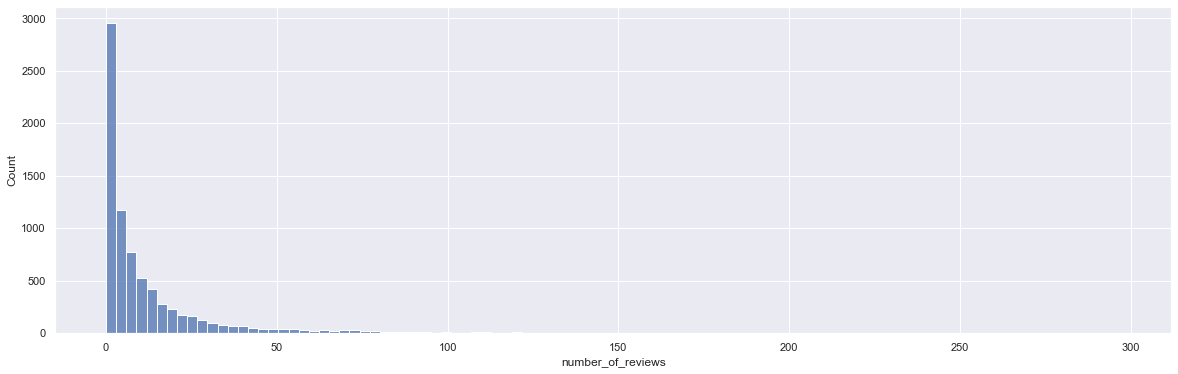

In [27]:
# Histogram of number of reviews
sns.histplot(airbnb_reviews['number_of_reviews'], bins=100)
plt.show()

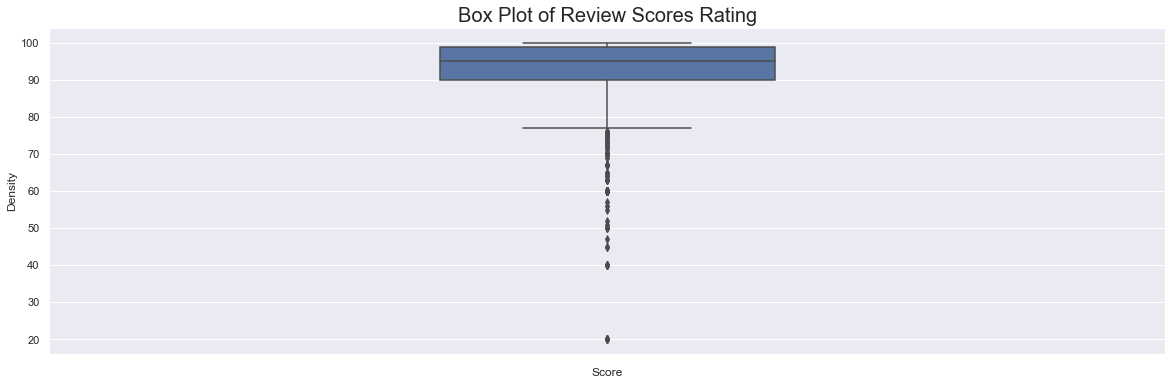

In [28]:
# Boxplot of review scores rating (0 to 100)
sns.boxplot(y=airbnb_reviews["review_scores_rating"], width=0.3);

plt.title('Box Plot of Review Scores Rating', fontsize=20)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

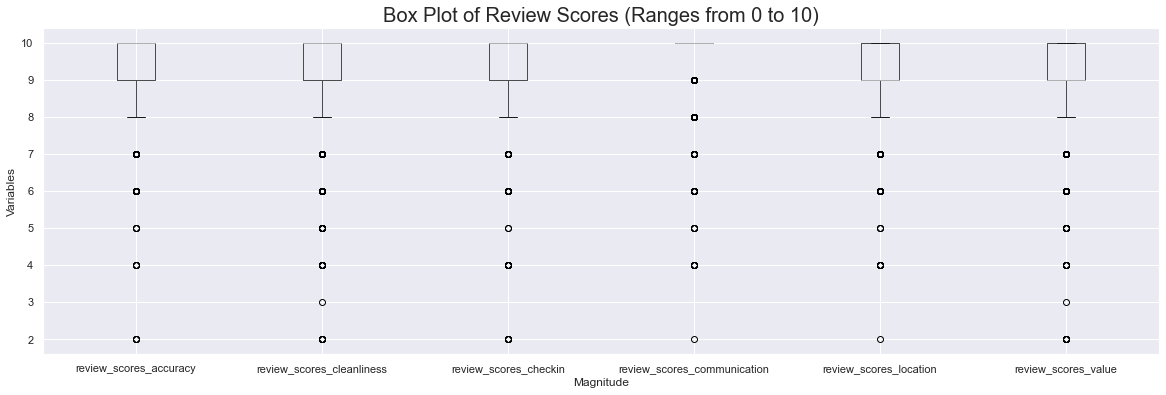

In [29]:
# Boxplot of review scores which ranges from 0 to 10
reviews_scores_0_10 = airbnb_reviews[['review_scores_accuracy', 
                                      'review_scores_cleanliness', 
                                      'review_scores_checkin', 
                                      'review_scores_communication', 
                                      'review_scores_location', 
                                      'review_scores_value']]

fig, ax = plt.subplots()

# build a box plot
reviews_scores_0_10.boxplot(widths=0.2)

# title and axis labels
plt.title('Box Plot of Review Scores (Ranges from 0 to 10)', fontsize=20)
ax.set_xlabel('Magnitude', fontsize=12)
ax.set_ylabel('Variables', fontsize=12)
xticklabels=['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

ax.yaxis.grid(True)
plt.show()

In [30]:
# Let's try defining "success" as having a 75th percentile for review score rating & number of reviews
airbnb_reviews[['number_of_reviews', 'review_scores_rating']].quantile(0.75)

number_of_reviews       15.0
review_scores_rating    99.0
Name: 0.75, dtype: float64

In [31]:
# How many listings fit both conditions (at 75th percentile)?
airbnb_reviews[(airbnb_reviews.number_of_reviews >= 15) 
                & (airbnb_reviews.review_scores_rating >= 99)].count()

number_of_reviews              163
review_scores_rating           163
review_scores_accuracy         163
review_scores_cleanliness      163
review_scores_checkin          163
review_scores_communication    163
review_scores_location         163
review_scores_value            163
dtype: int64

In [32]:
# Let's try defining "success" as having a 75th percentile for all review score types
airbnb_reviews.quantile(0.75)

number_of_reviews              15.0
review_scores_rating           99.0
review_scores_accuracy         10.0
review_scores_cleanliness      10.0
review_scores_checkin          10.0
review_scores_communication    10.0
review_scores_location         10.0
review_scores_value            10.0
Name: 0.75, dtype: float64

In [33]:
# How many listings fit all conditions (at 75th percentile for all conditions)?
airbnb_reviews[(airbnb_reviews.number_of_reviews >= 15) 
                & (airbnb_reviews.review_scores_rating >= 99)
                & (airbnb_reviews.review_scores_accuracy >= 10)
                & (airbnb_reviews.review_scores_cleanliness >= 10)
                & (airbnb_reviews.review_scores_checkin >= 10)
                & (airbnb_reviews.review_scores_communication >= 10)
                & (airbnb_reviews.review_scores_location >= 10)
                & (airbnb_reviews.review_scores_value >= 10)].count()

number_of_reviews              79
review_scores_rating           79
review_scores_accuracy         79
review_scores_cleanliness      79
review_scores_checkin          79
review_scores_communication    79
review_scores_location         79
review_scores_value            79
dtype: int64

In [34]:
hosts_90_pct = 79/total_hosts*100
print("If we define 'success' as having at least 75th percentile for all review score types, it means only " + str(round(hosts_90_pct,1)) + "% of total hosts are successful") 

If we define 'success' as having at least 75th percentile for all review score types, it means only 1.2% of total hosts are successful


In [35]:
# Let's try defining "success" as having a 50th percentile for all review score types
airbnb_reviews.quantile(0.50)

number_of_reviews               5.0
review_scores_rating           95.0
review_scores_accuracy         10.0
review_scores_cleanliness      10.0
review_scores_checkin          10.0
review_scores_communication    10.0
review_scores_location          9.0
review_scores_value             9.0
Name: 0.5, dtype: float64

In [36]:
# How many hosts fit all conditions (at 50th percentile for all conditions)?
airbnb_reviews[(airbnb_reviews.number_of_reviews >= 5) 
                & (airbnb_reviews.review_scores_rating >= 95)
                & (airbnb_reviews.review_scores_accuracy >= 10)
                & (airbnb_reviews.review_scores_cleanliness >= 10)
                & (airbnb_reviews.review_scores_checkin >= 10)
                & (airbnb_reviews.review_scores_communication >= 10)
                & (airbnb_reviews.review_scores_location >= 9)
                & (airbnb_reviews.review_scores_value >= 9)].count()

number_of_reviews              1124
review_scores_rating           1124
review_scores_accuracy         1124
review_scores_cleanliness      1124
review_scores_checkin          1124
review_scores_communication    1124
review_scores_location         1124
review_scores_value            1124
dtype: int64

In [37]:
hosts_50_pct = 1124/total_hosts*100
print("If we define 'success' as having at least 50th percentile for all review score types, it means " + str(round(hosts_50_pct,1)) + "% of total hosts are successful.") 

If we define 'success' as having at least 50th percentile for all review score types, it means 17.6% of total hosts are successful.


### Checking "prices" Data

In [38]:
# Taking columns that I'll use to calculate an estimate of revenue
airbnb_revenue = airbnb[['host_id', 'id', 'accommodates', 'price', 'guests_included', 'minimum_nights', 'number_of_reviews']]
airbnb_revenue.head()

,host_id,id,accommodates,price,guests_included,minimum_nights,number_of_reviews
0,1662,304958,4,130,4,4,11
1,3159,2818,2,59,1,3,108
2,3718,103026,4,95,2,3,15
3,4716,550017,2,100,1,2,20
4,5271,4728389,6,250,2,2,1


In [39]:
# Adding the 'host_duration' column which was calculated in airbnb_reviews dataframe
airbnb_revenue['host_duration'] = year_diff
airbnb_revenue.head()

C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,host_id,id,accommodates,price,guests_included,minimum_nights,number_of_reviews,host_duration
0,1662,304958,4,130,4,4,11,7.0
1,3159,2818,2,59,1,3,108,7.0
2,3718,103026,4,95,2,3,15,7.0
3,4716,550017,2,100,1,2,20,7.0
4,5271,4728389,6,250,2,2,1,7.0


In [40]:
# Assuming that 50% of guests leave a review after their stay, calculate the total guests for each listing
number_of_bookings = airbnb_revenue['number_of_reviews'] * (100/50)
airbnb_revenue['number_of_bookings'] = round(number_of_bookings,0)
airbnb_revenue.head()

C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,host_id,id,accommodates,price,guests_included,minimum_nights,number_of_reviews,host_duration,number_of_bookings
0,1662,304958,4,130,4,4,11,7.0,22.0
1,3159,2818,2,59,1,3,108,7.0,216.0
2,3718,103026,4,95,2,3,15,7.0,30.0
3,4716,550017,2,100,1,2,20,7.0,40.0
4,5271,4728389,6,250,2,2,1,7.0,2.0


C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


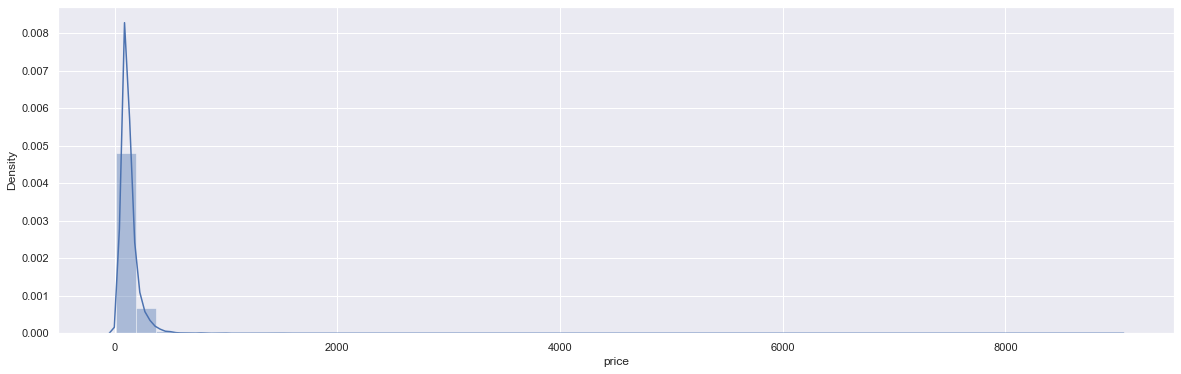

In [41]:
# See distribution of prices
sns.distplot(airbnb_revenue['price'], hist=True)
plt.show()

In [42]:
# Checking 'guests_included' data
airbnb_revenue.groupby('guests_included').size()

guests_included
0      195
1     4250
2     2584
3      150
4      514
5       48
6       59
7        3
8       13
10       8
13       1
15       3
16       5
dtype: int64

In [43]:
# Change guest_included for values '0' to '1' (doesn't make sense to have 0)
airbnb_revenue['guests_included'] = airbnb_revenue['guests_included'].replace(0, 1)

# Checking if the change works
airbnb_revenue['guests_included'].describe()

C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    7833.000000
mean        1.666794
std         1.119765
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: guests_included, dtype: float64

#### Defining "Revenue" 

I have defined Revenue as:
- Revenue = Revenue per Booking x Total number of bookings
- Revenue per Booking = Revenue per Night x Avg Nights per Booking

In [44]:
# Calculate revenue per night, by taking price, guest_included and accomodates.
# Assuming that for each night, the the occupancy is maximised according to the number of guests it can accomodate 
# (e.g. if 'accomodates'=2, then 2 guests stays per night)
# Then revenue per night is based on the number of guests included and price.
def revenue_per_night(accommodates, guests_included, price):
    if accommodates == guests_included:
        revenue_per_night = price
    elif accommodates > guests_included:
        revenue_per_night = (price/guests_included)*accommodates
    else:
        revenue_per_night = price
    return revenue_per_night

# Testing if function works
revenue_per_night(4, 2, 59)

118.0

In [45]:
# Add a new column 'revenue per booking' and applying the above function
airbnb_revenue['revenue_per_night'] = airbnb_revenue.apply(lambda x: revenue_per_night(x['accommodates'], x['guests_included'], x['price']), axis=1)
airbnb_revenue.head()

C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,host_id,id,accommodates,price,guests_included,minimum_nights,number_of_reviews,host_duration,number_of_bookings,revenue_per_night
0,1662,304958,4,130,4,4,11,7.0,22.0,130.0
1,3159,2818,2,59,1,3,108,7.0,216.0,118.0
2,3718,103026,4,95,2,3,15,7.0,30.0,190.0
3,4716,550017,2,100,1,2,20,7.0,40.0,200.0
4,5271,4728389,6,250,2,2,1,7.0,2.0,750.0


In [46]:
# Calculate Avg Nights per Booking
# Assuming that a traveller spends on average 3 days on Amsterdam, unless the minimum nights is above 3 (in that case, I'll take the min nights)

def avg_nights_per_booking(minimum_nights):
    if minimum_nights <= 3:
        avg_nights_per_booking = 3
    else:
        avg_nights_per_booking = minimum_nights
    return avg_nights_per_booking

# Testing if function works
avg_nights_per_booking(3)

3

In [47]:
# Add a new column 'avg night per booking' and applying the above function
airbnb_revenue['avg_nights_per_booking'] = airbnb_revenue.apply(lambda x: avg_nights_per_booking(x['minimum_nights']), axis=1)
airbnb_revenue.head()

C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,host_id,id,accommodates,price,guests_included,minimum_nights,number_of_reviews,host_duration,number_of_bookings,revenue_per_night,avg_nights_per_booking
0,1662,304958,4,130,4,4,11,7.0,22.0,130.0,4
1,3159,2818,2,59,1,3,108,7.0,216.0,118.0,3
2,3718,103026,4,95,2,3,15,7.0,30.0,190.0,3
3,4716,550017,2,100,1,2,20,7.0,40.0,200.0,3
4,5271,4728389,6,250,2,2,1,7.0,2.0,750.0,3


In [48]:
# Calculate revenue per booking by multiplying 'revenue per night' by 'avg nights per booking'. Then adding another column.
revenue_per_booking = airbnb_revenue['revenue_per_night'] * airbnb_revenue['avg_nights_per_booking']
airbnb_revenue['revenue_per_booking'] = revenue_per_booking
airbnb_revenue.head()

C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,host_id,id,accommodates,price,guests_included,minimum_nights,number_of_reviews,host_duration,number_of_bookings,revenue_per_night,avg_nights_per_booking,revenue_per_booking
0,1662,304958,4,130,4,4,11,7.0,22.0,130.0,4,520.0
1,3159,2818,2,59,1,3,108,7.0,216.0,118.0,3,354.0
2,3718,103026,4,95,2,3,15,7.0,30.0,190.0,3,570.0
3,4716,550017,2,100,1,2,20,7.0,40.0,200.0,3,600.0
4,5271,4728389,6,250,2,2,1,7.0,2.0,750.0,3,2250.0


In [49]:
# Calculate revenue per listing by multiplying 'revenue per booking' by 'number of bookings'. Then adding another column.
revenue = airbnb_revenue['revenue_per_booking'] * airbnb_revenue['number_of_bookings']
airbnb_revenue['revenue'] = revenue
airbnb_revenue.head()

C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,host_id,id,accommodates,price,guests_included,minimum_nights,number_of_reviews,host_duration,number_of_bookings,revenue_per_night,avg_nights_per_booking,revenue_per_booking,revenue
0,1662,304958,4,130,4,4,11,7.0,22.0,130.0,4,520.0,11440.0
1,3159,2818,2,59,1,3,108,7.0,216.0,118.0,3,354.0,76464.0
2,3718,103026,4,95,2,3,15,7.0,30.0,190.0,3,570.0,17100.0
3,4716,550017,2,100,1,2,20,7.0,40.0,200.0,3,600.0,24000.0
4,5271,4728389,6,250,2,2,1,7.0,2.0,750.0,3,2250.0,4500.0


Calculate revenue per host (as some hosts have more than 1 listing)

In [50]:
# Number hosts (count of unique host_id)
host_id_unique = airbnb.groupby('host_id').size()
pd.Series(host_id_unique).shape

(6378,)

In [51]:
# Number of listings per host (count of unique id groupby host_id) 
listings_per_host = airbnb_revenue.groupby('host_id')['id'].size().sort_values(ascending=False)
print(listings_per_host.quantile([.25, .5, .75, .90, .95, .99, 0.999, 0.9999]))
print(listings_per_host.max())

0.2500     1.0000
0.5000     1.0000
0.7500     1.0000
0.9000     1.0000
0.9500     2.0000
0.9900     5.0000
0.9990    23.2460
0.9999    78.8837
Name: id, dtype: float64
91


In [52]:
# Number of listings per host (count of unique id groupby host_id) - Shape
listings_per_host = airbnb_revenue.groupby('host_id')['id'].size().sort_values(ascending=False)
pd.Series(listings_per_host).shape

(6378,)

In [53]:
# Sum of revenue per host
revenue_per_host = airbnb_revenue.groupby('host_id')['revenue'].sum()
pd.Series(revenue_per_host).shape

(6378,)

In [54]:
# Max number of years active per host
host_years_active = airbnb_revenue.groupby('host_id')['host_duration'].max()
pd.Series(host_years_active).shape

(6378,)

In [55]:
# Curious to see if number of reviews has a correlation with revenue per host per year
# Add a column reviews per host
review_per_host = airbnb_revenue.groupby('host_id')['number_of_reviews'].sum()
pd.Series(review_per_host).shape

(6378,)

In [56]:
# New dataframe of listings per host
airbnb_host_revenue = pd.DataFrame({'listings_per_host':listings_per_host,
                                    'revenue_per_host':revenue_per_host,
                                    'host_years_active':host_years_active,
                                    'review_per_host':review_per_host})
airbnb_host_revenue.head()

,listings_per_host,revenue_per_host,host_years_active,review_per_host
host_id,,,,
1000518,1,20400.0,4.0,20
10008585,1,12000.0,2.0,20
10009103,2,83772.0,2.0,91
10013744,1,15120.0,2.0,7
10015905,3,165000.0,2.0,86


In [57]:
#Reset index
airbnb_host_revenue = airbnb_host_revenue.reset_index()
airbnb_host_revenue.head()

,host_id,listings_per_host,revenue_per_host,host_years_active,review_per_host
0,1000518,1,20400.0,4.0,20
1,10008585,1,12000.0,2.0,20
2,10009103,2,83772.0,2.0,91
3,10013744,1,15120.0,2.0,7
4,10015905,3,165000.0,2.0,86


In [58]:
# Add revenue per host per year active
revenue_per_year = airbnb_host_revenue['revenue_per_host'] / airbnb_host_revenue['host_years_active']
airbnb_host_revenue['revenue_per_year'] = revenue_per_year
airbnb_host_revenue.head()

,host_id,listings_per_host,revenue_per_host,host_years_active,review_per_host,revenue_per_year
0,1000518,1,20400.0,4.0,20,5100.0
1,10008585,1,12000.0,2.0,20,6000.0
2,10009103,2,83772.0,2.0,91,41886.0
3,10013744,1,15120.0,2.0,7,7560.0
4,10015905,3,165000.0,2.0,86,82500.0


In [59]:
# Add reviews per host per year active
review_per_year = airbnb_host_revenue['review_per_host'] / airbnb_host_revenue['host_years_active']
airbnb_host_revenue['review_per_year'] = review_per_year
airbnb_host_revenue.head()

,host_id,listings_per_host,revenue_per_host,host_years_active,review_per_host,revenue_per_year,review_per_year
0,1000518,1,20400.0,4.0,20,5100.0,5.0
1,10008585,1,12000.0,2.0,20,6000.0,10.0
2,10009103,2,83772.0,2.0,91,41886.0,45.5
3,10013744,1,15120.0,2.0,7,7560.0,3.5
4,10015905,3,165000.0,2.0,86,82500.0,43.0


In [60]:
# See how revenue is distributed
airbnb_host_revenue['revenue_per_year'].describe()

count      6378.000000
mean       9259.428558
std       20600.740931
min           0.000000
25%         780.000000
50%        3240.000000
75%        9408.000000
max      604800.000000
Name: revenue_per_year, dtype: float64

In [61]:
# How many do not earn any money?
airbnb_host_revenue[(airbnb_host_revenue.revenue_per_year == 0)].count()

host_id              1135
listings_per_host    1135
revenue_per_host     1135
host_years_active    1135
review_per_host      1135
revenue_per_year     1135
review_per_year      1135
dtype: int64

In [62]:
# Percentage of hosts who do not earn anything
print(str(round((1135/6378*100),1)) + "% of hosts do not earn anything.")

17.8% of hosts do not earn anything.


C:\Users\sakina.sakdun\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


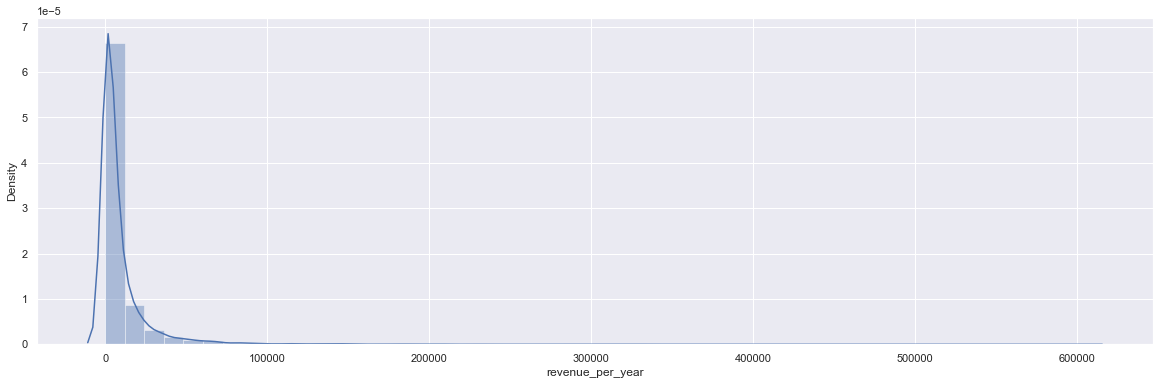

In [63]:
# See a histogram of revenue per host per year
sns.distplot(airbnb_host_revenue['revenue_per_year'], hist=True)
plt.show()

In [64]:
# Let's take "successful" host as 95th percentile of revenue per host per year
revenue_95_pct = airbnb_host_revenue['revenue_per_year'].quantile(0.95)
print("At 95th percentile, successful hosts can make €" + str(round(revenue_95_pct,2)) + " per year.")

At 95th percentile, successful hosts can make €37319.25 per year.


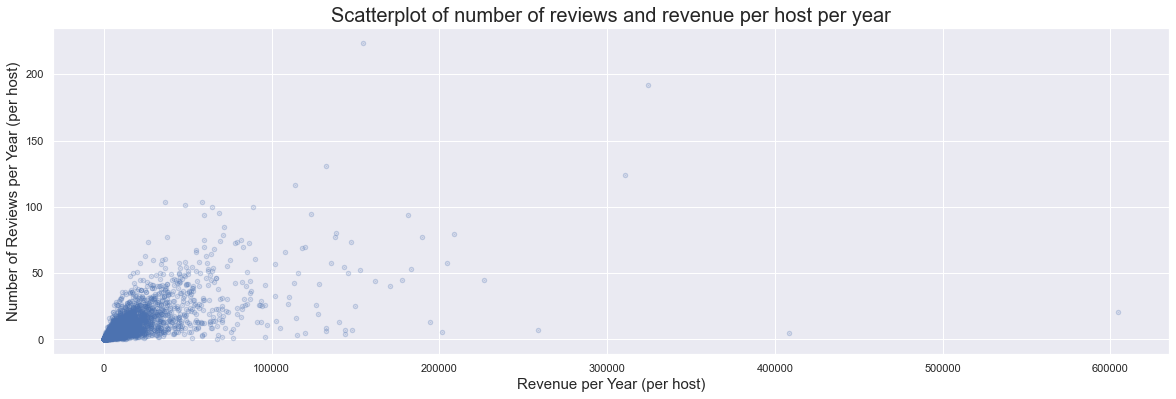

In [65]:
# See correlation between reviews and revenue
# Scatterplot of number of reviews and revenue per host per year
plt.scatter(x=airbnb_host_revenue['revenue_per_year'], y=airbnb_host_revenue['review_per_year'], s=2, linewidths=4, alpha=0.3)

plt.title('Scatterplot of number of reviews and revenue per host per year', fontsize=20)
plt.xlabel('Revenue per Year (per host)', fontsize=15)
plt.ylabel('Number of Reviews per Year (per host)', fontsize=15)
plt.grid(True)
plt.show()

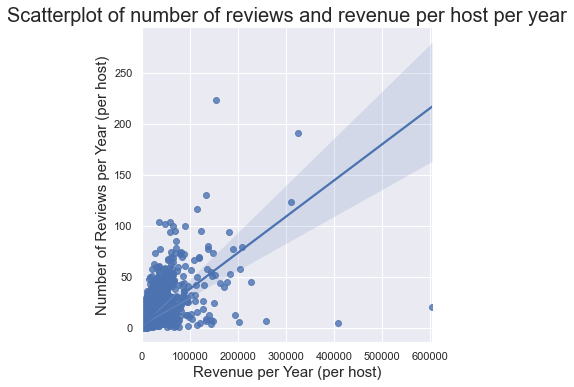

In [66]:
sns.lmplot(data=airbnb_host_revenue, x='revenue_per_year', y='review_per_year', fit_reg = True)

plt.title('Scatterplot of number of reviews and revenue per host per year', fontsize=20)
plt.xlabel('Revenue per Year (per host)', fontsize=15)
plt.ylabel('Number of Reviews per Year (per host)', fontsize=15)
plt.grid(True)
plt.show()

In [67]:
airbnb_host_revenue[['revenue_per_year', 'review_per_year']].corr()

,revenue_per_year,review_per_year
revenue_per_year,1.000000,0.655136
review_per_year,0.655136,1.000000


### Checking  "Property Types" Data

In [68]:
# How many types of properties are there?
airbnb.groupby('property_type').size().sort_values(ascending=False)

property_type
Apartment          6280
House               711
Bed & Breakfast     370
Boat                327
Loft                 77
Other                29
Cabin                12
Camper/RV            11
Villa                 8
Dorm                  2
Yurt                  2
Chalet                1
Earth House           1
Hut                   1
Treehouse             1
dtype: int64

In [69]:
# Which property type receives the most positive reviews?
airbnb.groupby('property_type')['review_scores_rating'].mean().sort_values(ascending=False)

property_type
Chalet             100.000000
Dorm                95.000000
Loft                94.125000
Boat                94.033835
Earth House         94.000000
House               93.691089
Apartment           93.405785
Hut                 92.000000
Camper/RV           91.666667
Bed & Breakfast     91.384342
Villa               91.166667
Other               89.842105
Cabin               85.444444
Yurt                80.000000
Treehouse                 NaN
Name: review_scores_rating, dtype: float64

### Checking  "Neighbourhoods" in Amsterdam

In [70]:
# How many neighbourhoods are there in Amsterdam and which neighborhoods host the most listings?
airbnb.groupby('neighbourhood_cleansed').size().sort_values(ascending=False)

neighbourhood_cleansed
Centrum-West                              1426
De Baarsjes - Oud-West                    1203
Centrum-Oost                               920
De Pijp - Rivierenbuurt                    906
Westerpark                                 689
Zuid                                       579
Oud-Oost                                   410
Bos en Lommer                              339
Oostelijk Havengebied - Indische Buurt     338
Oud-Noord                                  206
Watergraafsmeer                            179
Slotervaart                                142
IJburg - Zeeburgereiland                   101
Buitenveldert - Zuidas                      84
Noord-West                                  72
Geuzenveld - Slotermeer                     58
Noord-Oost                                  47
De Aker - Nieuw Sloten                      42
Osdorp                                      41
Bijlmer-Centrum                             24
Bijlmer-Oost                         

In [71]:
# Which neighborhoods receive the most positive reviews?
airbnb.groupby('neighbourhood_cleansed')['review_scores_rating'].mean().sort_values(ascending=False)

neighbourhood_cleansed
IJburg - Zeeburgereiland                  95.056338
Slotervaart                               94.415094
Centrum-Oost                              93.904441
Zuid                                      93.782506
Oostelijk Havengebied - Indische Buurt    93.691406
De Pijp - Rivierenbuurt                   93.688591
Oud-Oost                                  93.559211
Westerpark                                93.407407
De Baarsjes - Oud-West                    93.316481
Centrum-West                              93.068142
Bos en Lommer                             92.992620
Oud-Noord                                 92.684932
Watergraafsmeer                           92.600000
Noord-West                                92.480769
Gaasperdam - Driemond                     92.444444
Osdorp                                    92.129032
Buitenveldert - Zuidas                    91.573770
De Aker - Nieuw Sloten                    90.961538
Geuzenveld - Slotermeer                  

In [72]:
import folium

locations = airbnb[['latitude', 'longitude']]
locationlist = locations.values.tolist()
print(len(locationlist))
print(locationlist[7]) #random point

7833
[52.35564811, 4.885834819]


In [73]:
map = folium.Map(location=[52.35564811, 4.885834819], zoom_start=12)

for point in range(0, 200):
    folium.Marker(locationlist[point], popup=airbnb['neighbourhood_cleansed']).add_to(map)
map